In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_boston

In [2]:
df = pd.read_csv("aemet_and.csv")
df.head()


df.drop("Unnamed: 0", axis = 1, inplace=True)

#Crear formato fecha y sacar la columna mes
df["fecha"] = pd.to_datetime(df["fecha"])
df["mes"] = df["fecha"].dt.month

#Reordenar las columnas
ordenado = df.reindex(columns=["fecha", "mes", "nombre", "provincia", "altitud", "tmed", "tmin", "tmax", "prec", "velmedia", "racha"]).sort_values(["nombre", "fecha"])

#Sacar las capitales de provincia
capitales = ordenado[(ordenado["nombre"]=="ALMERÍA AEROPUERTO")|
                (ordenado["nombre"]=="CÁDIZ")|
                (ordenado["nombre"]=="CÓRDOBA AEROPUERTO")|
                (ordenado["nombre"]=="GRANADA AEROPUERTO")|
                (ordenado["nombre"]=="HUELVA")|
                (ordenado["nombre"]=="JAÉN")|
                (ordenado["nombre"]=="MÁLAGA")|
                (ordenado["nombre"]=="SEVILLA AEROPUERTO")]
capitales.head()

#Sustituir comas por puntos y los valores "Ip" por Nones
nocomas = capitales.replace(",",".", regex=True)
noip = nocomas.replace("Ip", None, regex=True)


#Convertir las columnas de str en float
noip["tmed"]=noip["tmed"].astype(float)
noip["tmax"]=noip["tmax"].astype(float)
noip["tmin"]=noip["tmin"].astype(float)
noip["prec"]=noip["prec"].astype(float)
noip["velmedia"]=noip["velmedia"].astype(float)
noip["racha"]=noip["racha"].astype(float)
noip["provincia"]=noip["provincia"].astype(str)

#Borrar NaN
temp= noip.dropna(how="any")
temp.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 33 to 14235
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      2186 non-null   datetime64[ns]
 1   mes        2186 non-null   int64         
 2   nombre     2186 non-null   object        
 3   provincia  2186 non-null   object        
 4   altitud    2186 non-null   int64         
 5   tmed       2186 non-null   float64       
 6   tmin       2186 non-null   float64       
 7   tmax       2186 non-null   float64       
 8   prec       2186 non-null   float64       
 9   velmedia   2186 non-null   float64       
 10  racha      2186 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 204.9+ KB


c:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\missing.py:94: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [3]:
temp.describe()

,mes,altitud,tmed,tmin,tmax,prec,velmedia,racha
count,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,6.523788,214.810613,19.403111,13.589799,25.216743,1.089067,3.335270,10.174474
std,3.449489,253.045616,6.730591,6.509410,7.913327,4.178612,1.902501,3.645841
min,1.000000,2.000000,4.200000,-5.300000,7.600000,0.000000,0.000000,2.800000
25%,4.000000,21.000000,13.800000,9.100000,18.600000,0.000000,1.900000,7.800000
50%,7.000000,90.000000,19.200000,13.600000,24.000000,0.000000,3.100000,9.700000
75%,10.000000,560.000000,24.500000,18.700000,31.300000,0.000000,4.200000,11.700000
max,12.000000,580.000000,36.300000,28.200000,44.800000,64.500000,14.200000,26.700000


In [4]:
#plotly bubble charts

data = [
    {
        'y': temp['tmed'],
        'x': temp['mes'],
        'mode': 'markers',
        'marker': {
            'color': temp["tmin"],
            'size': temp["tmax"],
            'showscale': True
        },
        'text': temp['provincia']
    }
]

iplot(data)

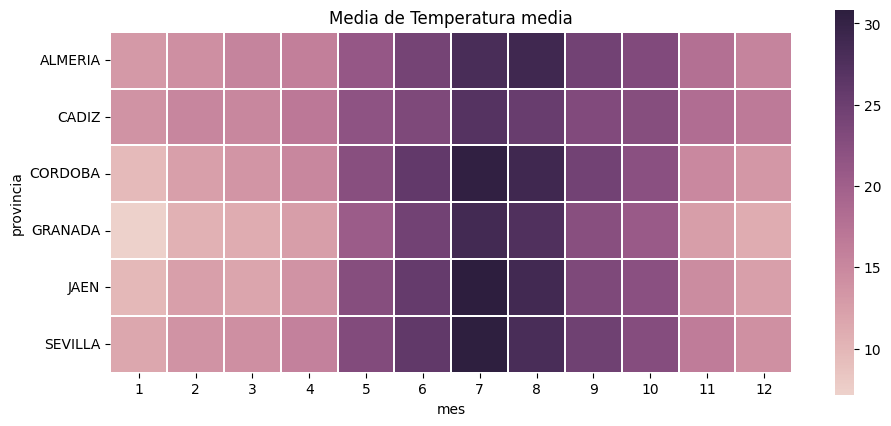

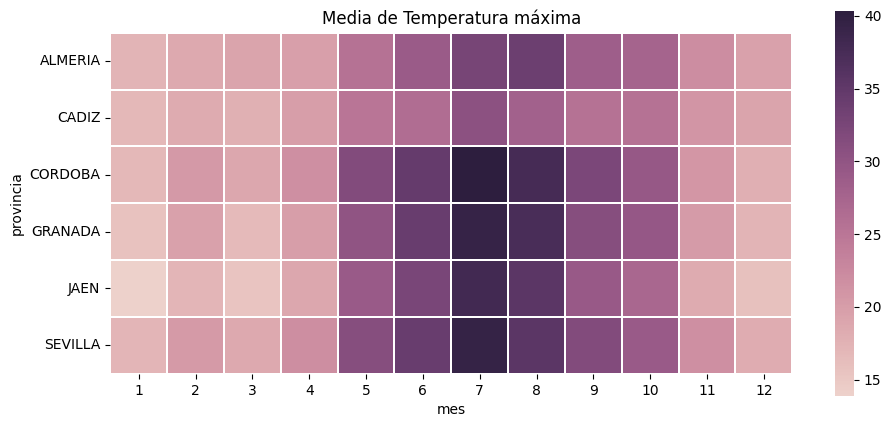

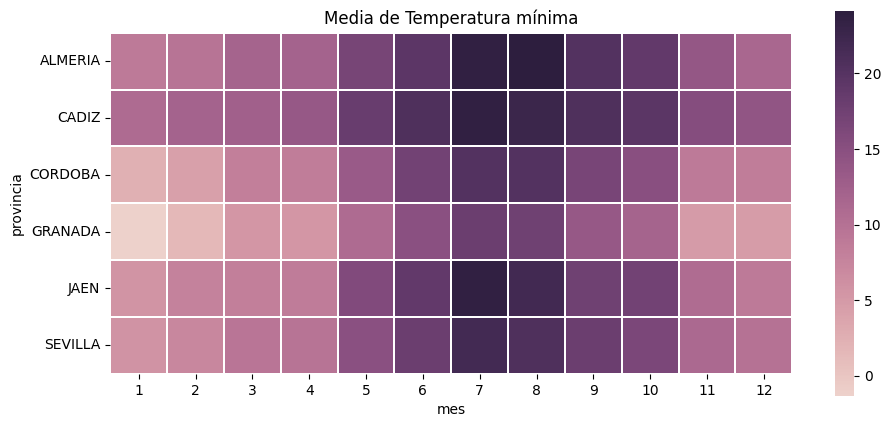

In [5]:
data = temp.groupby(["provincia", "mes"]).mean()["tmed"].unstack()

plt.figure(figsize=(11,5))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            cmap=sns.cubehelix_palette(as_cmap=True)).set(title='Media de Temperatura media');

data = temp.groupby(["provincia", "mes"]).mean()["tmax"].unstack()

plt.figure(figsize=(11,5))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            cmap=sns.cubehelix_palette(as_cmap=True)).set(title='Media de Temperatura máxima');


data = temp.groupby(["provincia", "mes"]).mean()["tmin"].unstack()

plt.figure(figsize=(11,5))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            cmap=sns.cubehelix_palette(as_cmap=True)).set(title='Media de Temperatura mínima');


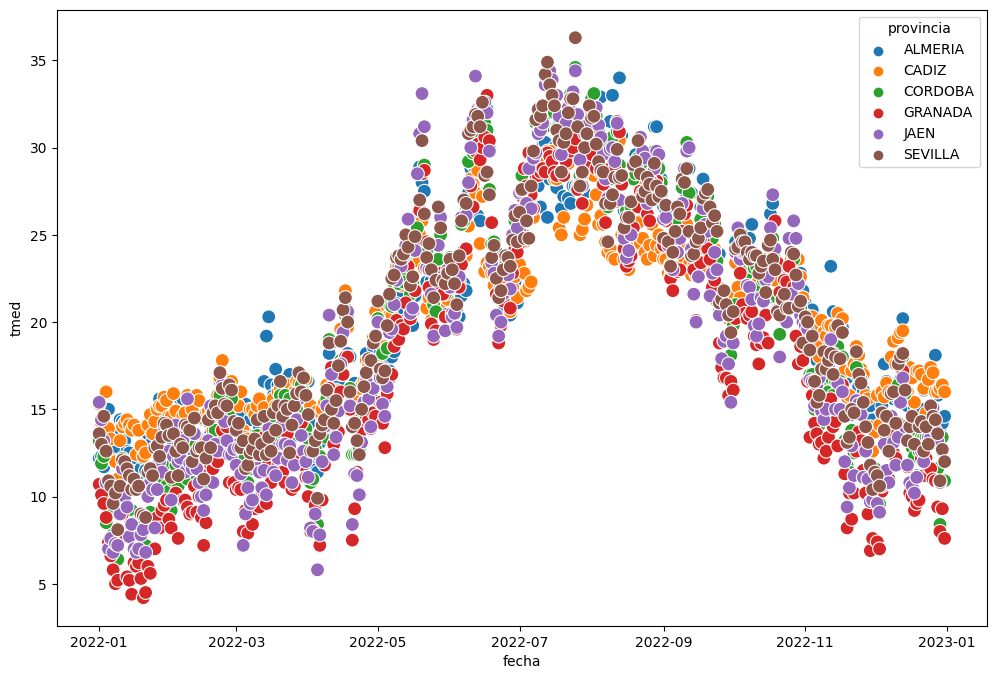

In [6]:
dt_graf = temp.groupby(["provincia", "fecha"]).mean()["tmed"].unstack()
plt.figure(figsize=(12,8))
sns.scatterplot(x = temp["fecha"],
y = temp["tmed"],
s = 100,
hue = temp["provincia"]);

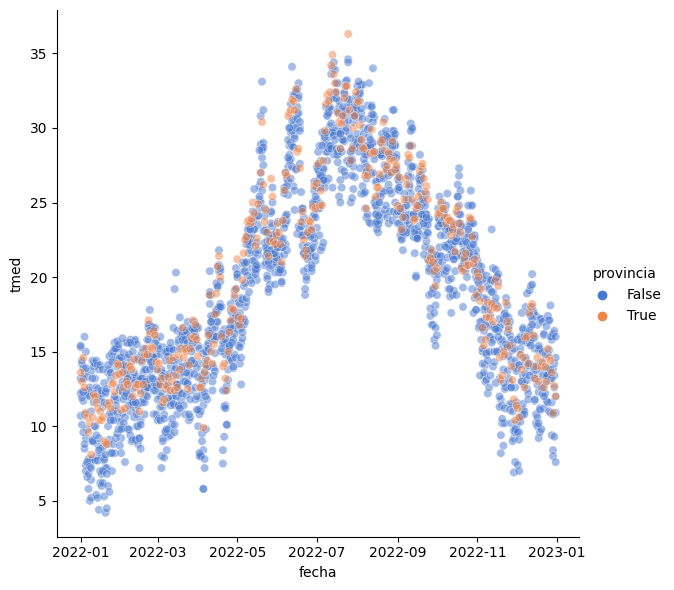

In [7]:
sns.relplot(data=temp,
            x= temp["fecha"],
            y= temp["tmed"],
            hue = temp["provincia"] == "SEVILLA",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

C:\Users\jorge\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\jorge\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\jorge\AppData\Roaming\Python\Python37\site-packag

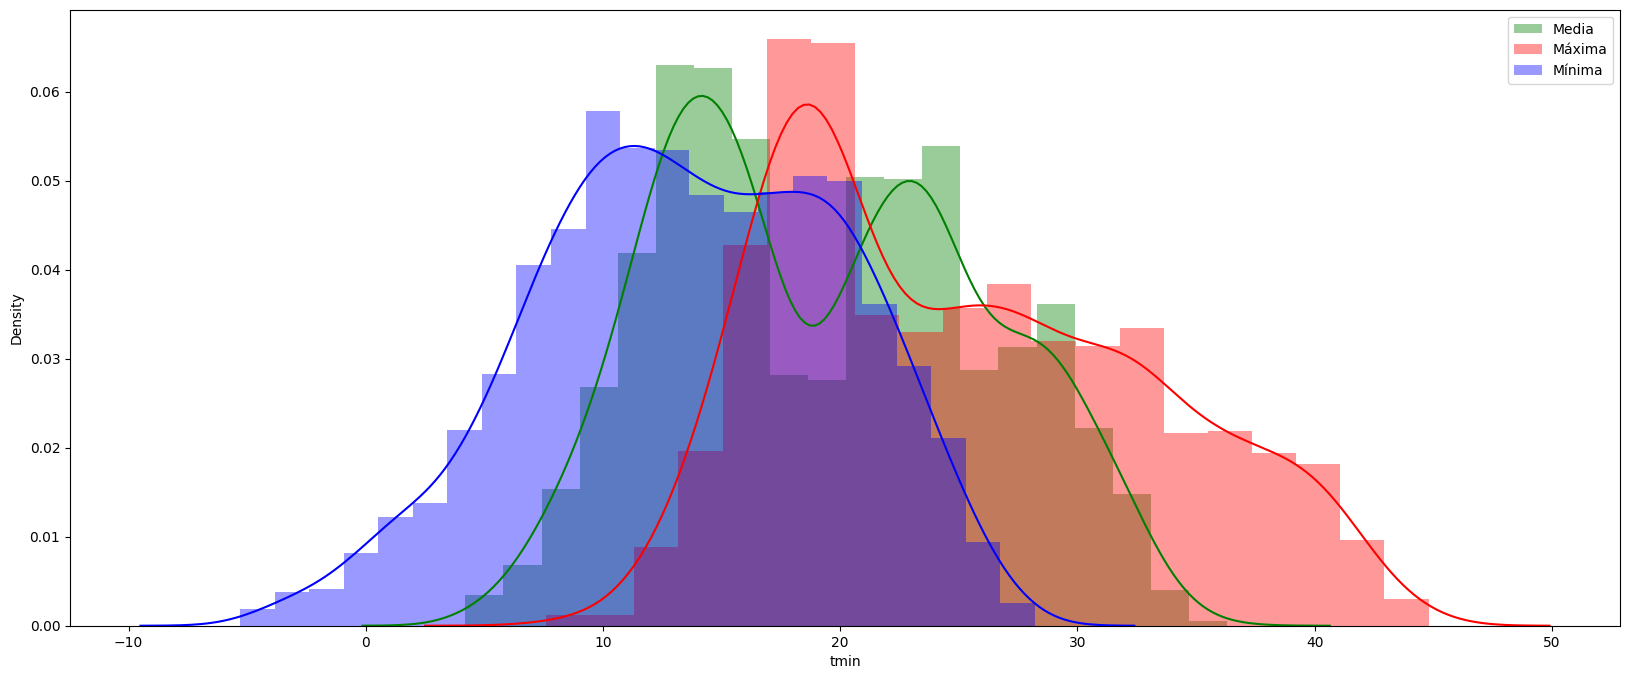

In [8]:
plt.figure(figsize=(20,8))
sns.distplot(temp["tmed"] , color="green", label="Media")
sns.distplot(temp["tmax"]  , color="red", label="Máxima")
sns.distplot(temp["tmin"]  , color="blue", label="Mínima")
plt.legend();

<Figure size 1600x800 with 0 Axes>

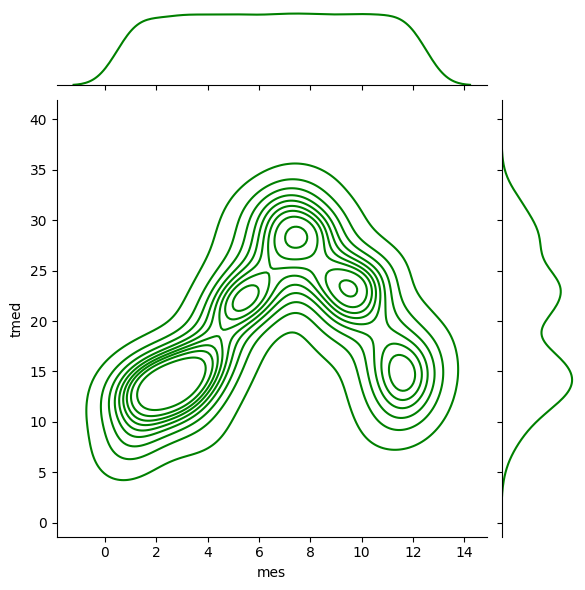

In [9]:
plt.figure(figsize=(16,8))
sns.jointplot(x= temp["mes"],
              y= temp["tmed"],
              kind = "kde",
              color = "green");

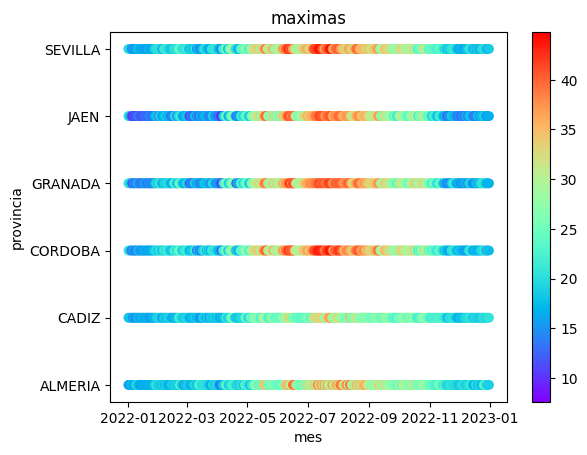

In [10]:
fig = plt.figure()
scat = plt.scatter(temp["fecha"], 
                   temp["provincia"], 
                   c=temp["tmax"], 
                   cmap=plt.cm.rainbow)
 
# colorbar to explain the color scheme
fig.colorbar(scat)
 
plt.xlabel("mes")
plt.ylabel("provincia")
plt.title('maximas')
plt.show()

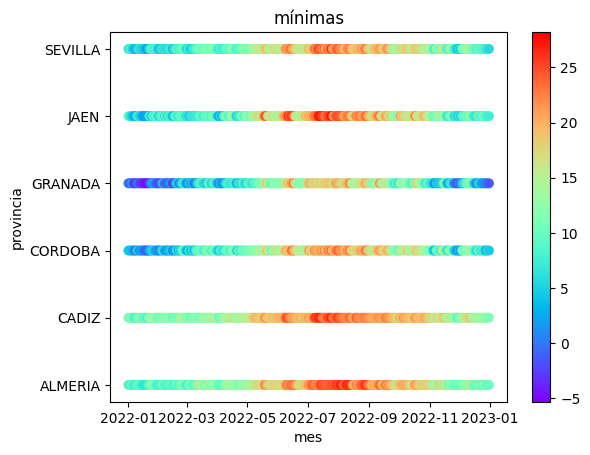

In [11]:
fig = plt.figure()
scat = plt.scatter(temp["fecha"], 
                   temp["provincia"], 
                   c=temp["tmin"], 
                   cmap=plt.cm.rainbow)
 
# colorbar to explain the color scheme
fig.colorbar(scat)
 
plt.xlabel("mes")
plt.ylabel("provincia")
plt.title('mínimas')
plt.show()

c:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



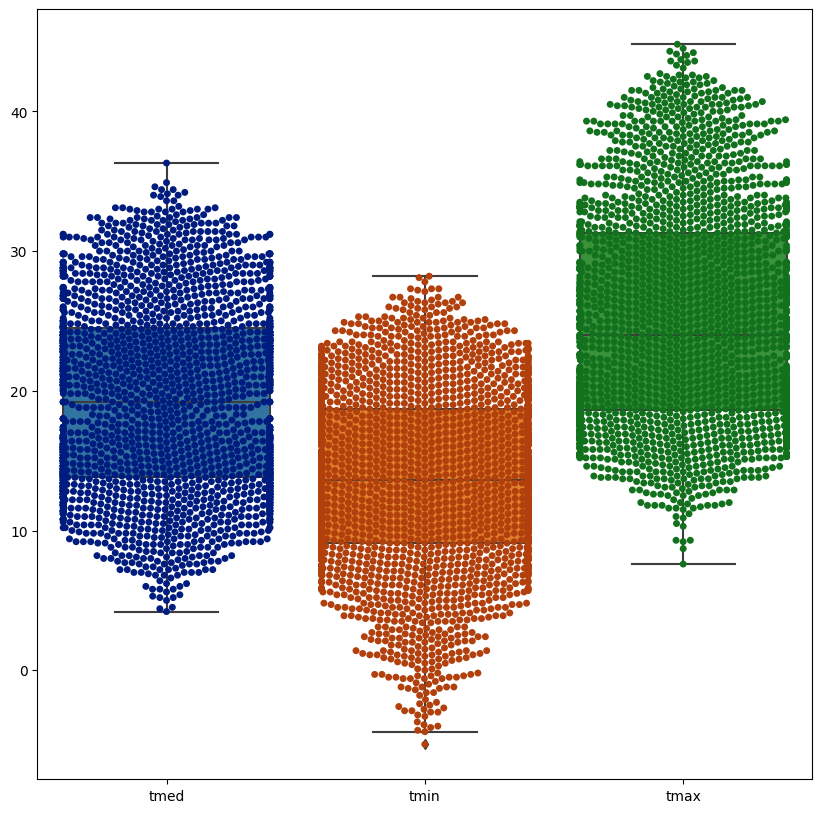

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(data=temp[temp.columns.values[5:8]])
sns.swarmplot(data=temp[temp.columns.values[5:8]], palette="dark");

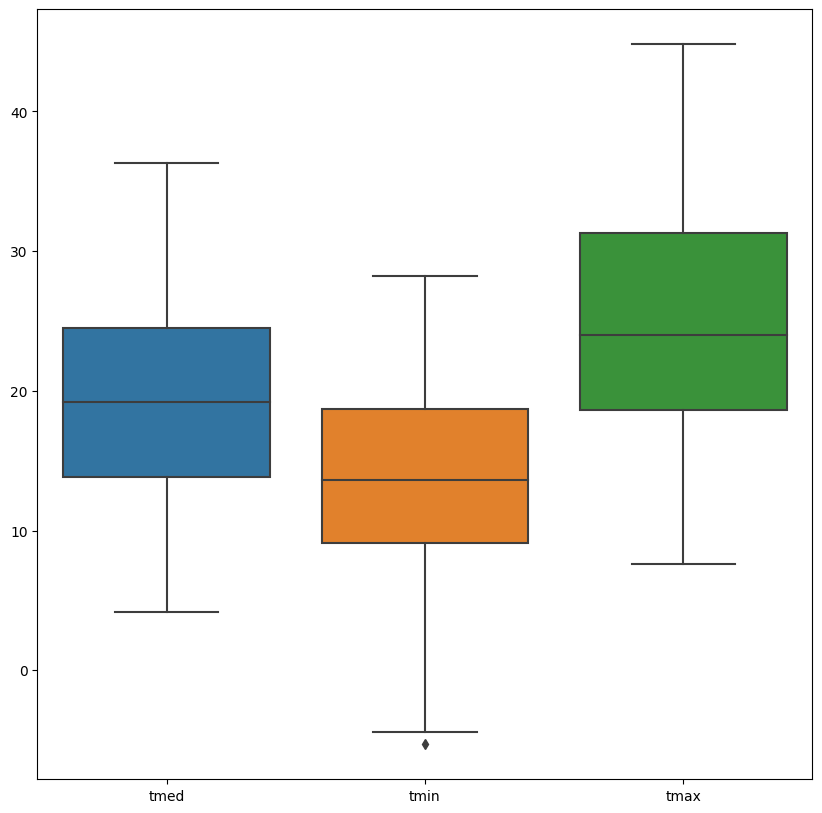

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=temp[temp.columns.values[5:8]]);

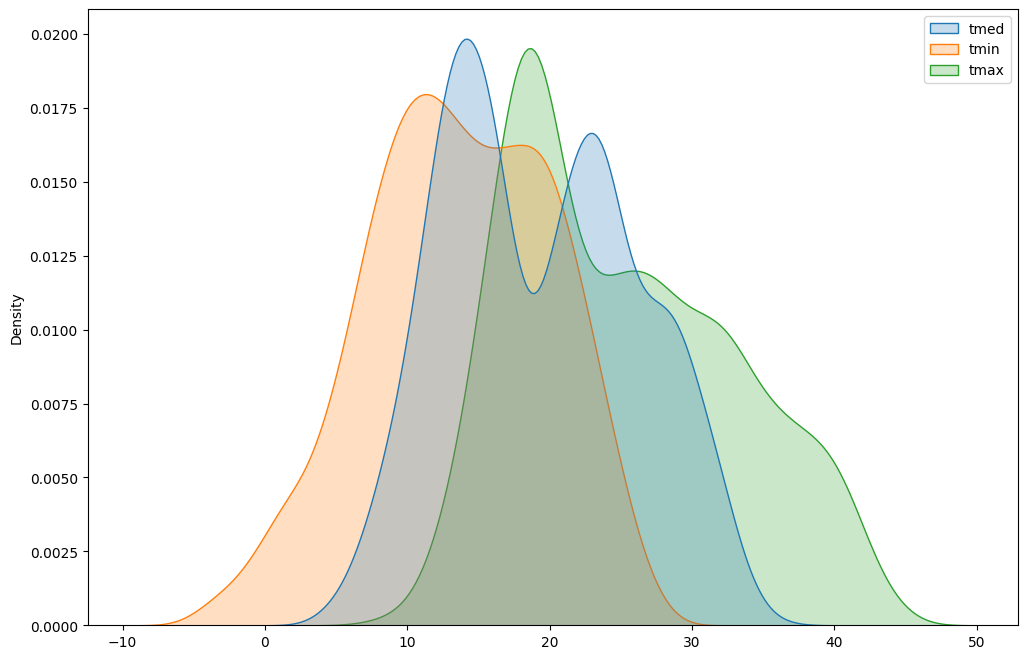

In [14]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = temp[temp.columns.values[5:8]], fill = True);

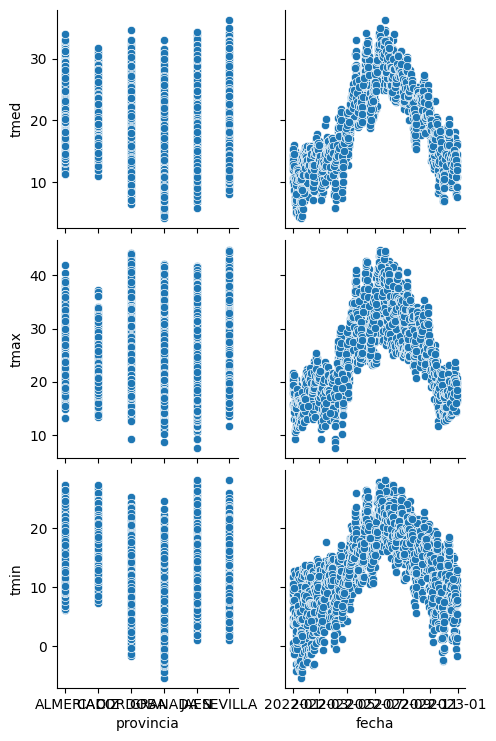

In [15]:
sns.pairplot(
    temp,
    x_vars=["provincia", "fecha"],
    y_vars=["tmed", "tmax", "tmin"]
)